# Week 3 Assignment

In [414]:
import pandas as pd
import numpy as np

# Energy

In [415]:
Energy = pd.read_excel('Energy Indicators.xls', header=17, skipfooter=38, na_values='...',
                       dtype={'Petajoules': np.float64, 'Gigajoules	': np.float64,'%': np.float64,})
Energy.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321.0,10.0,78.669280
1,NaN,Albania,Albania,102.0,35.0,100.000000
2,NaN,Algeria,Algeria,1959.0,51.0,0.551010
3,NaN,American Samoa,American Samoa,NaN,NaN,0.641026
4,NaN,Andorra,Andorra,9.0,121.0,88.695650


In [416]:
Energy.drop(['Unnamed: 0','Unnamed: 1'], axis=1, inplace=True)
Energy.rename(columns={'Unnamed: 2':'Country', 'Petajoules':'Energy Supply',
                       'Gigajoules':'Energy Supply per Capita','%':'% Renewable'}, inplace=True)

In [417]:
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


In [418]:
sorted(Energy['Country'])

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia1',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China, Hong Kong Special Administrative Region3',
 'China, Macao Special Administrative Region4',
 'China2',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark5

In [419]:
Energy.shape

(227, 4)

In [420]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   227 non-null    object 
 1   Energy Supply             222 non-null    float64
 2   Energy Supply per Capita  222 non-null    float64
 3   % Renewable               227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.2+ KB


In [421]:
Energy.isnull().sum()

Country                     0
Energy Supply               5
Energy Supply per Capita    5
% Renewable                 0
dtype: int64

In [422]:
Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [423]:
Energy['Country'] = Energy['Country'].str.extract('(\D+)', expand=False)

In [424]:
dict_rename = {"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong",
              }

In [425]:
Energy['Country'].replace(dict_rename, inplace=True)

In [426]:
Energy['Country'] = Energy['Country'].str.replace(r"\(.*\)","").str.strip()

In [427]:
sorted(Energy['Country'])

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Macao Special Administrative Region',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Sa

# GDP

In [428]:
GDP = pd.read_csv('world_bank.csv', header=4)
GDP.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [429]:
GDP.shape

(264, 60)

In [430]:
#sorted(GDP['Country Name'])

In [431]:
dict_rename_GDP={
"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
}

In [432]:
GDP['Country Name'].replace(dict_rename_GDP, inplace=True)

In [433]:
# GDP['Country Name'] = GDP['Country Name'].str.split(',').str[0]

In [434]:
# GDP['Country Name'] = GDP['Country Name'].str.replace(r"\(.*\)","").str.strip()

In [435]:
GDP = pd.concat([GDP.iloc[:,0],GDP.iloc[:,50:]],axis = 1)

In [436]:
GDP.rename(columns={'Country Name':'Country'},inplace=True)

In [437]:
GDP.head()

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [438]:
# sorted(GDP['Country'])

# ScimEn

In [439]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [440]:
ScimEn.shape

(191, 8)

In [441]:
#sorted(ScimEn['Country'])

In [442]:
# dict_rename_Sci={
#     'Côte d’Ivoire':"Côte d'Ivoire",
#     'Russian Federation':'Russia',
#     'Viet Nam':'Vietnam'
# }

In [443]:
# ScimEn['Country'].replace(dict_rename_Sci, inplace=True)

In [444]:
# sorted(ScimEn['Country'])

# Merging 3 dataframes

In [445]:
#sorted(Energy.merge(GDP,on='Country',how='outer').merge(ScimEn,on='Country',how='outer')['Country'])

In [446]:
outerjoin = ScimEn.merge(Energy,on='Country',how='outer').merge(GDP,on='Country',how='outer')
innerjoin = ScimEn.merge(Energy,on='Country',how='inner').merge(GDP,on='Country',how='inner')


In [447]:
outerjoin.shape

(318, 21)

In [448]:
innerjoin.shape

(162, 21)

In [449]:
print(len(Energy))
print(len(GDP))
print(len(ScimEn))

227
264
191


In [450]:
merged_df = innerjoin.copy()

In [451]:
merged_df.set_index('Country', inplace=True)

In [452]:
merged_df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [453]:
merged_df.shape

(162, 20)

In [454]:
merged_df = merged_df[merged_df.Rank<16]
merged_df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

In [455]:
len(outerjoin) - len(innerjoin)

156

#### What are the top 15 countries for average GDP over the last 10 years?

In [456]:
merged_df.iloc[:,10:].mean(axis=1).sort_values(ascending=False)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [457]:
avgGDP = merged_df.iloc[:,10:].mean(axis=1).sort_values(ascending=False)
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [458]:
type(avgGDP)

pandas.core.series.Series

#### By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [459]:
merged_df[merged_df['Rank'] == 6]['2015'] - merged_df[merged_df['Rank'] == 6]['2006']

Country
Canada    2.281399e+11
dtype: float64

#### What is the mean energy supply per capita?

In [460]:
merged_df['Energy Supply per Capita'].mean()

157.6

#### What country has the maximum % Renewable and what is the percentage?

In [461]:
merged_df['% Renewable'].idxmax(), merged_df['% Renewable'].max()

('Brazil', 69.64803)

#### Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

In [462]:
merged_df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13


In [463]:
merged_df['Citation Ratio'] = merged_df['Self-citations'] / merged_df['Citations']
merged_df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Citation Ratio
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031


In [464]:
merged_df['Citation Ratio'].idxmax(), merged_df['Citation Ratio'].max()

('China', 0.6893126179389422)

#### Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

In [465]:
merged_df['Population'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']

In [466]:
(merged_df['Population']).sort_values(ascending=False).iloc[2:].idxmax()

'United States'

#### Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

In [467]:
merged_df['Citable documents per Capita'] = merged_df['Citable documents'] / merged_df['Population']
merged_df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,Citation Ratio,Population,Citable documents per Capita
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128


In [468]:
merged_df['Citable documents per Capita'].corr(merged_df['Energy Supply per Capita'])

0.7940010435442946

In [469]:
import matplotlib as plt
%matplotlib inline

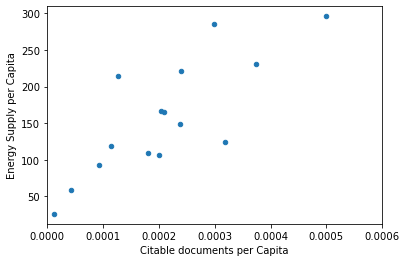

In [470]:
merged_df.plot(x='Citable documents per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006]);

#### Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [471]:
merged_df['HighRenew'] = merged_df['% Renewable'].apply(lambda x: 1 if x>= merged_df['% Renewable'].median() else 0)

In [472]:
merged_df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Citation Ratio,Population,Citable documents per Capita,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0


In [473]:
merged_df['HighRenew']

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

#### Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [474]:
# Continent={'Asia':['China', 'Japan','Russian Federation','India','South Korea','Iran'],
#           'Europe':['Germany','France','Italy','Spain','United Kingdom'],
#           'North America':['United States','Canada'],
#            'South America': ['Brazil'],
#           'Australia':['Australia']}

Inverse Dictionary

In [475]:
# inv_cont = {vi: k  for k, v in Continent.items() for vi in v}
# inv_cont

In [476]:
# Continent.items()

In [477]:
# inv_cont.items()

In [478]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [479]:
merged_df.index.to_series().map(ContinentDict)

Country
China                          Asia
United States         North America
Japan                          Asia
United Kingdom               Europe
Russian Federation           Europe
Canada                North America
Germany                      Europe
India                          Asia
France                       Europe
South Korea                    Asia
Italy                        Europe
Spain                        Europe
Iran                           Asia
Australia                 Australia
Brazil                South America
Name: Country, dtype: object

In [480]:
merged_df['Continent'] = merged_df.index.to_series().map(ContinentDict)
merged_df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Citation Ratio,Population,Citable documents per Capita,HighRenew,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1,Asia
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0,North America
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0,Asia
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0,Europe
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1,Europe


In [481]:
Cont_df = merged_df.groupby('Continent')['Population'].agg(['size','sum', 'mean', 'std'])
Cont_df

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


#### Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [482]:
multi_idx_df = merged_df.copy()
multi_idx_df['% Renewable'] = pd.cut(multi_idx_df['% Renewable'], 5)

In [483]:
merged_df.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Citation Ratio,Population,Citable documents per Capita,HighRenew,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1,Asia
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0,North America


In [484]:
multi_idx_df = multi_idx_df.reset_index().set_index(['Continent','% Renewable']).sort_index()
multi_idx_df

Country  Rank  Documents  \
Continent     % Renewable                                             
Asia          (2.212, 15.753]                Japan     3      30504   
              (2.212, 15.753]                India     8      15005   
              (2.212, 15.753]          South Korea    10      11983   
              (2.212, 15.753]                 Iran    13       8896   
              (15.753, 29.227]               China     1     127050   
Australia     (2.212, 15.753]            Australia    14       8831   
Europe        (2.212, 15.753]       United Kingdom     4      20944   
              (15.753, 29.227]  Russian Federation     5      18534   
              (15.753, 29.227]             Germany     7      17027   
              (15.753, 29.227]              France     9      13153   
              (29.227, 42.701]               Italy    11      10964   
              (29.227, 42.701]               Spain    12       9428   
North America (2.212, 15.753]        United States     2      96661   
              (56.174, 69.648]              Canada     6      17899   
South America (56.174, 69.648]              Brazil    15       8668   

                                Citable documents  Citations  Self-citations  \
Continent     % Renewable                                                      
Asia          (2.212, 15.753]               30287     223024           61554   
              (2.212, 15.753]               14841     128763           37209   
              (2.212, 15.753]               11923     114675           22595   
              (2.212, 15.753]                8819      57470           19125   
              (15.753, 29.227]             126767     597237          411683   
Australia     (2.212, 15.753]                8725      90765           15606   
Europe        (2.212, 15.753]               20357     206091           37874   
              (15.753, 29.227]              18301      34266           12422   
              (15.753, 29.227]              16831     140566           27426   
              (15.753, 29.227]              12973     130632           28601   
              (29.227, 42.701]              10794     111850           26661   
              (29.227, 42.701]               9330     123336           23964   
North America (2.212, 15.753]               94747     792274          265436   
              (56.174, 69.648]              17620     215003           40930   
South America (56.174, 69.648]               8596      60702           14396   

                                Citations per document  H index  \
Continent     % Renewable                                         
Asia          (2.212, 15.753]                     7.31      134   
              (2.212, 15.753]                     8.58      115   
              (2.212, 15.753]                     9.57      104   
              (2.212, 15.753]                     6.46       72   
              (15.753, 29.227]                    4.70      138   
Australia     (2.212, 15.753]                    10.28      107   
Europe        (2.212, 15.753]                     9.84      139   
              (15.753, 29.227]                    1.85       57   
              (15.753, 29.227]                    8.26      126   
              (15.753, 29.227]                    9.93      114   
              (29.227, 42.701]                   10.20      106   
              (29.227, 42.701]                   13.08      115   
North America (2.212, 15.753]                     8.20      230   
              (56.174, 69.648]                   12.01      149   
South America (56.174, 69.648]                    7.00       86   

                                Energy Supply  Energy Supply per Capita  ...  \
Continent     % Renewable                                                ...   
Asia          (2.212, 15.753]    1.898400e+10                     149.0  ...   
              (2.212, 15.753]    3.319500e+10                      26.0  ...   
              

In [485]:
multi_idx_df.groupby(['Continent','% Renewable'], observed=True)['Country'].count()

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: Country, dtype: int64

#### Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

In [486]:
f'{12345678.90:,}'

'12,345,678.9'

In [487]:
merged_df['Population'].apply(lambda x: f'{x:,}')

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object

In [488]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = merged_df
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


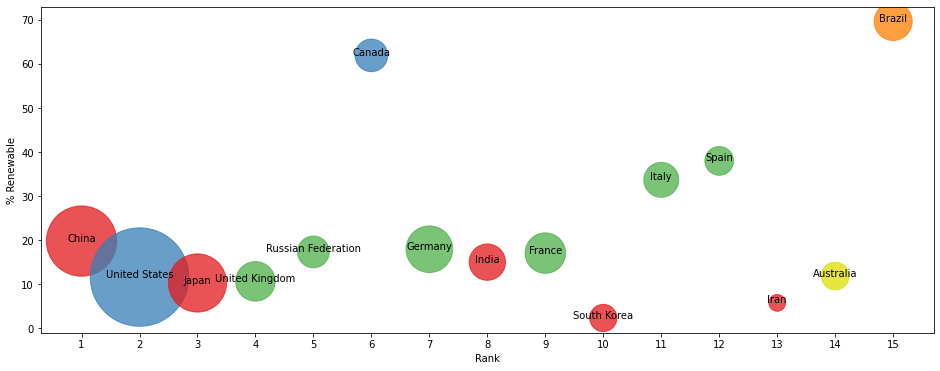

In [489]:
plot_optional()